In [23]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from jupyter_core.version import match
from transformers.pipelines import values

from data_preparation.data_cleaning import depression_submissions

FileNotFoundError: [Errno 2] No such file or directory: 'linked_datasets/SuicideWatch_linked_submissions.csv'

In [2]:
def clean_and_standardize_comments(df):

    df_cleaned = df.dropna(subset=['author', 'content'])
    df_cleaned = df_cleaned[df_cleaned['author'] != 'u/[deleted]']
    df_cleaned = df_cleaned[df_cleaned['content'] != '[removed]']
    
    # # Mapping for standardized categories
    # category_mapping = {
    #     "1.Empathy-based comments": 1,
    #     "2.Advice-based comments": 2,
    #     "3.Comments sharing similar experience": 3,  # Add more categories as needed
    #     "4.Others/random": 4,
    #     "5.Invalid": 5
    # }
    
     # Define a function to extract the main category using regex
    def extract_category(comment):
        comment = str(comment)
        match = re.findall(r'\d', comment)
        if len(match) == 1: 
            return int(match[0])
        else:
            return comment
    
    df_cleaned["comments_categ"] = df_cleaned["comments_categ"].apply(extract_category)

    return df_cleaned

In [3]:
depression_comments_categorized = pd.read_csv('results/depression_comments_categorized_gemma.csv')
depression_comments_categorized_standardized = clean_and_standardize_comments(depression_comments_categorized)
suicide_comments_categorized = pd.read_csv('results/suicide_comments_categorized_gemma.csv')
suicide_comments_categorized_standardized = clean_and_standardize_comments(suicide_comments_categorized)

In [4]:
depression_comments_categorized_standardized

,author,content,link,thread_id,comments_categ
0,u/0sovian,One thing I've found that helps is to accept t...,https://www.reddit.com/r/depression/comments/1...,10002gk,2
1,u/Mountain-Log-1322,Stay strong,https://www.reddit.com/r/depression/comments/1...,1000ar3,1
3,u/Chatague,Hug. It'll get better. Anxiety is a bitch. Hav...,https://www.reddit.com/r/depression/comments/1...,1000e0k,1
4,u/impatient_kangaroo,is it okay to say that i hope that you will re...,https://www.reddit.com/r/depression/comments/1...,1000q09,1
5,u/Pale-Trinket8718,We’re all in the same boat. We don’t feel acce...,https://www.reddit.com/r/depression/comments/1...,1000q09,1
...,...,...,...,...,...
565008,u/Alternative_Luck3336,What time is it for you ?,https://www.reddit.com/r/depression/comments/z...,zzzpos,4
565009,u/Forest_wanderer13,You mountain time? Happen to be in CO? I hate ...,https://www.reddit.com/r/depression/comments/z...,zzzpos,1
565010,u/bunnie1419623,There are options. There’s always a last resor...,https://www.reddit.com/r/depression/comments/z...,zzzpos,2
565011,u/despairupupu,hey i dont know if i calculated right (probabl...,https://www.reddit.com/r/depression/comments/z...,zzzpos,1


In [5]:
depression_comments_categorized_standardized['comments_categ'].value_counts()

comments_categ
1                                                                                                                 277305
2                                                                                                                  56145
4                                                                                                                  54010
3                                                                                                                  42461
5                                                                                                                    230
                                                                                                                   ...  
1.Empathy-based comments  \n\n\n\n\n2.Advice-based comments \n\n\n\n3.Comments sharing similar experience              1
1. Empathy-based comments  \n2. Advice-based comments                                                                  1
1. Empathy-based 

In [6]:
suicide_comments_categorized_standardized

,author,content,link,thread_id,comments_categ
2,u/La__leche__,Oh poor kitty! I'm sure she'll be home soon. C...,https://www.reddit.com/r/SuicideWatch/comments...,10002bx,2
3,u/Expensive_Painter142,I tried. She is never late. I don't know I'm d...,https://www.reddit.com/r/SuicideWatch/comments...,10002bx,1
4,u/Expensive_Painter142,She is home now 😭🙏🏻,https://www.reddit.com/r/SuicideWatch/comments...,10002bx,1
5,u/La__leche__,This is the best news. I'm so pleased for you ...,https://www.reddit.com/r/SuicideWatch/comments...,10002bx,1
6,u/ronnie_bronson,"I’m am Soo sorry about this, you go to the aut...",https://www.reddit.com/r/SuicideWatch/comments...,10003aq,1
...,...,...,...,...,...
532846,u/Blood_Barbie,You’re awesome,https://www.reddit.com/r/SuicideWatch/comments...,zzzmc1,1
532847,u/Wild_Albatross7534,A lot of people are here for you. What are yo...,https://www.reddit.com/r/SuicideWatch/comments...,zzzmc1,1
532848,u/Blood_Barbie,Just things,https://www.reddit.com/r/SuicideWatch/comments...,zzzmc1,4
532849,u/Wild_Albatross7534,Let me know if I can help. I hope your stuff d...,https://www.reddit.com/r/SuicideWatch/comments...,zzzmc1,1


In [7]:
suicide_comments_categorized_standardized['comments_categ'].value_counts()

comments_categ
1                                                                                                              183635
4                                                                                                               75915
2                                                                                                               46331
3                                                                                                               26180
5                                                                                                                 448
                                                                                                                ...  
1.Empathy-based comments \n 2.Advice-based comments \n 3.Comments sharing similar experience                        1
I need the post content to categorize it. Please provide the post text.                                             1
I need the content of the post to categor

In [72]:
def clean_and_standardize_submissions(df):

    df_cleaned = df.dropna(subset=['author', 'content'])
    df_cleaned = df_cleaned[df_cleaned['author'] != 'u/[deleted]']
    df_cleaned = df_cleaned[df_cleaned['content'] != '[removed]']
    
    def extract_category(comment):
        comment = str(comment)
        match = re.findall(r'\d', comment)
        if len(match) == 1: 
            return int(match[0])
        else:
            return comment
    
    df_cleaned["submissions_categ"] = df_cleaned["submissions_categ"].apply(extract_category)

    return df_cleaned

In [73]:
depression_submissions_categorized = pd.read_csv('results/depression_submissions_categorized_gemma.csv')
depression_submissions_categorized_standardized = clean_and_standardize_submissions(depression_submissions_categorized)
suicide_submissions_categorized = pd.read_csv('results/suicide_submissions_categorized_gemma.csv')
suicide_submissions_categorized_standardized = clean_and_standardize_submissions(suicide_submissions_categorized)

In [74]:
depression_submissions_categorized_standardized

,author,content,link,thread_id,submissions_categ
1,u/pixelman_0266,I haven't been truly happy in half a decade Th...,https://www.reddit.com/r/depression/comments/r...,rtet6a,2
3,u/domanby,Is this depression? This may be a stupid quest...,https://www.reddit.com/r/depression/comments/r...,rtex2o,1
4,u/talhamisbah5,EVERYONE welcome to read this but for relatibi...,https://www.reddit.com/r/depression/comments/r...,rtexfm,1
5,u/Xxmadmonkey55,Lovesick I don’t really know how to explain th...,https://www.reddit.com/r/depression/comments/r...,rtf1ra,1
6,u/RedLaserFlashes,From zero to 60 Ever feel fairly content with ...,https://www.reddit.com/r/depression/comments/r...,rtf3xb,1
...,...,...,...,...,...
162726,u/StMattJonesCel,I'm just a Failure at life. I'm Really a Pathe...,https://www.reddit.com/r/depression/comments/1...,NaN,1
162727,u/MarcieoftheOceanBlue,Delusion I don’t even know what to say. I have...,https://www.reddit.com/r/depression/comments/1...,100ep4h,1
162728,u/Background_Idea_7838,Is this normal for someone with depression to ...,https://www.reddit.com/r/depression/comments/1...,100eran,1
162729,u/Lil-Queen_needs-Naps,"How can I change my mindset. I’m 29f, dealing ...",https://www.reddit.com/r/depression/comments/1...,100euj3,1


In [75]:
depression_submissions_categorized_standardized["submissions_categ"].value_counts()

submissions_categ
1                                                                                                                                     75485
2                                                                                                                                     18990
4                                                                                                                                      3690
3                                                                                                                                       890
5                                                                                                                                       307
Please provide the post content so I can categorize it.                                                                                   4
I cannot categorize the post as I do not have access to its content.  Please provide me with the post content so I can assist you.        1
Na

In [76]:
suicide_submissions_categorized_standardized

,author,content,link,thread_id,submissions_categ
0,u/crybaby3333,Hi,https://www.reddit.com/r/SuicideWatch/comments...,rteq5r,4
1,u/_Concert_,Numb I’m graduating this year. As the date get...,https://www.reddit.com/r/SuicideWatch/comments...,rter10,1
2,u/tropicalrainforest,"I think 2022 might be it. So, a little backgro...",https://www.reddit.com/r/SuicideWatch/comments...,rter98,1
5,u/kihroudy,"happy new year, proud of you [removed]",https://www.reddit.com/r/SuicideWatch/comments...,NaN,4
6,u/No_Manager1431,Finding a new normal Wife took the kids and le...,https://www.reddit.com/r/SuicideWatch/comments...,NaN,1
...,...,...,...,...,...
175460,u/royfirehero,Daydreaming about suicide I've been having sui...,https://www.reddit.com/r/SuicideWatch/comments...,100ep94,1
175461,u/tankmenss,Why am i still alive I wanna fucjing die alrea...,https://www.reddit.com/r/SuicideWatch/comments...,100epes,1
175462,u/codename_jackass,Hopefully I’m able to buy this gun,https://www.reddit.com/r/SuicideWatch/comments...,NaN,4
175466,u/Lovedbug,i cant go no longer im tired of feeling like t...,https://www.reddit.com/r/SuicideWatch/comments...,NaN,1


In [77]:
suicide_submissions_categorized_standardized["submissions_categ"].value_counts()

submissions_categ
1                                                                                              83843
2                                                                                              10213
4                                                                                               5772
5                                                                                                587
3                                                                                                442
Please provide the post content so I can categorize it.                                            2
I need the post content to categorize it.  Please provide the "[removed]" part of the post.        1
Please provide the content of the post so I can categorize it.                                     1
Name: count, dtype: int64

In [78]:
def plot_category_distribution(df, column_name, subreddit_name, type):
    # Apply the transformation to the specified column
    df[column_name] = df[column_name].apply(
        lambda x: '4' if str(x) not in ['1', '2', '3'] else x
    )
    
    # Get the value counts
    value_counts = df[column_name].value_counts()
    
    # Plot the distribution
    plt.figure(figsize=(8, 6))
    ax = value_counts.plot(kind='bar', color='skyblue')
    
    # Add numerical annotations above each bar
    for i, value in enumerate(value_counts):
        ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)
    
    # Set the plot title and labels
    plt.title(f'Distribution of {type} Categories in r/{subreddit_name}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    
    # Display the plot
    plt.show()

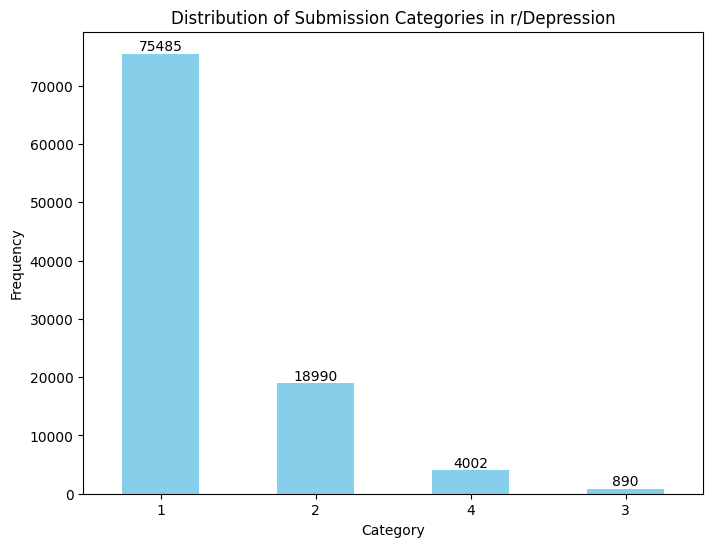

In [79]:
plot_category_distribution(depression_submissions_categorized_standardized, 'submissions_categ', 'Depression', 'Submission')

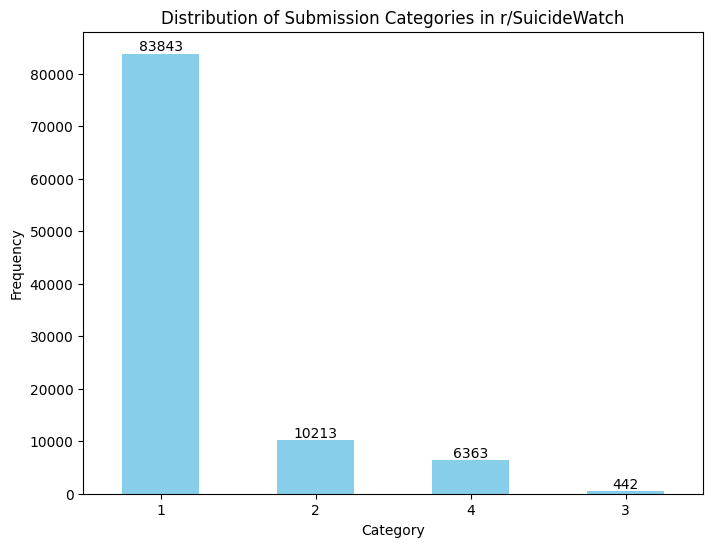

In [51]:
plot_category_distribution(suicide_submissions_categorized_standardized, 'submissions_categ', 'SuicideWatch', 'Submission')

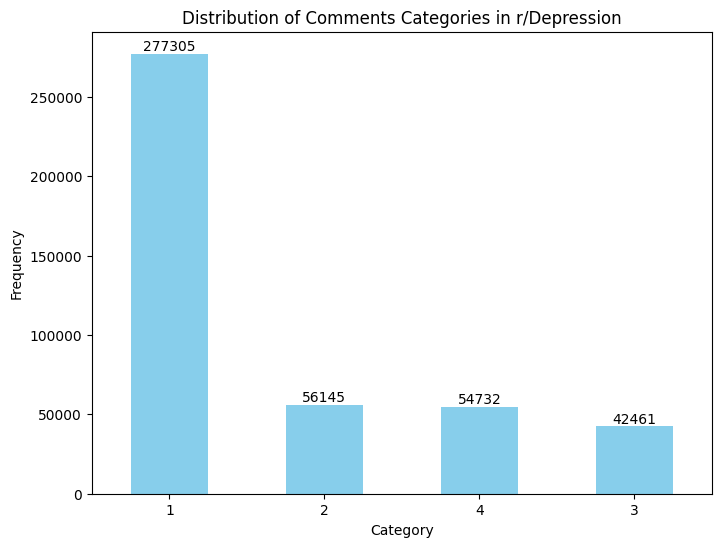

In [52]:
plot_category_distribution(depression_comments_categorized_standardized, 'comments_categ', 'Depression', 'Comments')

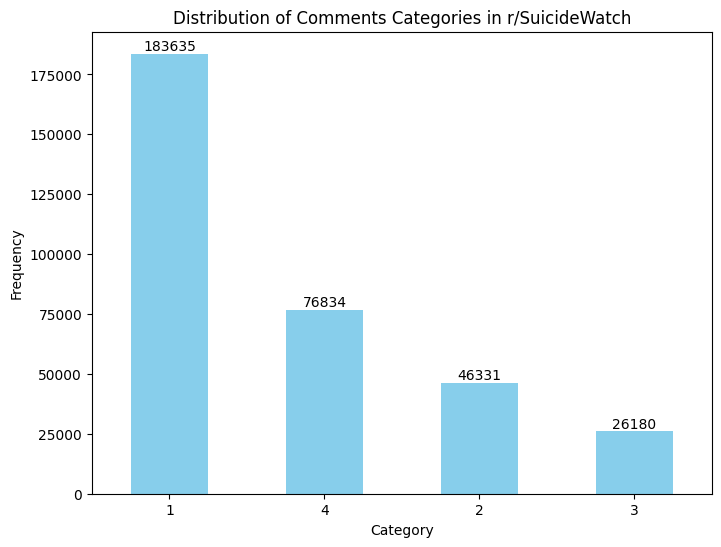

In [53]:
plot_category_distribution(suicide_comments_categorized_standardized, 'comments_categ', 'SuicideWatch', 'Comments')